Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [46]:
NAME = "Golubev Ilya"
COLLABORATORS = ""

---

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

\Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [48]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x_n = x0
    for niter in range(maxiter):
        x_n1 = x_n - f(x_n)/fder(x_n)
        if np.abs(x_n1 - x_n) < eps:
            break
        x_n = x_n1
    return x_n, niter

In [49]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

### Your code here.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


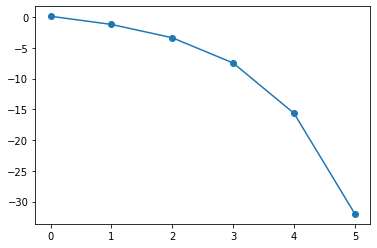

In [50]:
x, y = [], []
for i in range(1, 10):
    xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4, eps=1e-15, maxiter=i)
    y.append(np.log(xx-1))
    x.append(nit)
plt.plot(x, y, 'o-')

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [51]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x = x0
    for it in range(maxiter):
        x_n1 = x - (m * f(x)) / fder(x)
        if np.abs(x_n1 - x) < eps:
            break
        x = x_n1
    return x, it

In [52]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

### Your code here.

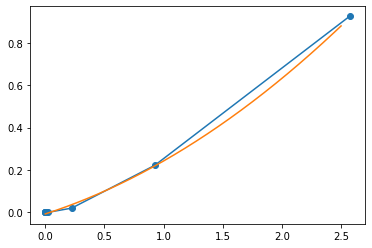

In [53]:
m = 2
x0 = 7
axis_x = []
axis_y = []
x_n1, iter = mod_newton(lambda x: (x**2 - 1)**2, lambda x: 2*(x**2 - 1) * 2 * x, x0=x0, m=m, maxiter=1, eps=1e-9)
for maxiter in range(2, 10):
    x_n, iter = mod_newton(lambda x: (x**2 - 1)**2, lambda x: 2*(x**2 - 1) * 2 * x, x0=x0, m=m, maxiter=maxiter, eps=1e-9)
    axis_y.append(np.abs(x_n-1))
    axis_x.append(np.abs(x_n1 - 1))
    x_n1 = x_n
plt.plot(axis_x, axis_y, 'o-')
p = np.arange(0, 2.5, 0.001)
q = 0.07*p**2+0.18*p-0.007
plt.plot(p, q)
plt.show()

# Часть III. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [54]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Якобиан `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    X_n = X0
    for niter in range(maxiter):
        X_n1 = X_n - np.linalg.inv(jcb(X_n)) @ F(X_n)
        if np.linalg.norm(X_n1 - X_n) < eps:
            break
        X_n = X_n1
    return X_n, niter

In [55]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1,
                     X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                     [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

Напишите функцию, возвращающую матрицу якобиана функции трех переменных `func2`:

In [56]:
def func2(X):
    x, y, z = X
    return np.array([x**2 + y**2 + z**2 - 25,
                     x*y + y*z + z*x - 5,
                     x + y - 3])

def jac2(X):
    """Return the Jacobian of `func2(X)`.
    
    
    The Jacobian matrix is defined as 
    
    $$
    J_{ij} = \partial f_i / \partial x_j
    $$
    
    so that the first row contains the derivatives of $f_0$
    with respect to the first, second etc coordinates; the second
    row contains the derivatives of $f_1$ with respect to
    the first, second etc coordinates; and so on.
    """
    x, y, z = X
    Jac = np.array([[2*x, 2*y, 2*z], [y + z, x + z, y + x], [1, 1, 0]])
    return Jac

In [57]:
X = [1, 2, 3]
assert jac2(X).shape == (3, 3)


In [58]:
# more testing in this cell, keep it intact
